# Usage Analytics on Ford GoBike Sharing System
## by Uchenna Urom



## Investigation Overview

The goal of the investigation in this project was to analyse and identify key features affecting usage in the Ford GoBike Sharing system in the greater San Fransisco Bay Area in February 2019. Some major determining features included the Usertype, the day of the week and hour of day.


## Dataset Overview

The data is a csv excel spreadsheet containing 174, 952 recorded bike rides to and from different stations. There are 9 variables describing the features of the each ride. 
Some of the variables are the user-type, date and time of each ride, start and end station names, bike id and user gender.

The dataset was also divided into two tables to conform with tidiness standards. The `trip_df` table containing information on the each trip taken by a user. Also, the `user_df` table carries information about the user on each trip. 8, 460 rows were dropped from the original datset due to missing values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Data Assessment and Cleaning

Assess and clean the data to ensure it is fit for use
#### Assessment

- The datatypes for start_time and end_time columns are not correct
- Missing values in member_birth_year, member_gender, start_station_name, and end_station_name columns
- Extraneous columns in the dataset
- Columns of different observational  types in one table

In [3]:
bike_data = bike_df.copy() #create a copy of the data first

### Define
Correct the datatypes for the start_time and end_time columns

In [4]:
# convert the datatypes to datetime
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

### Define 

Drop rows with missing values

In [5]:
bike_data.dropna(inplace =True)

### Define
Remove columns from dataset that wouldn't be necessary for our analysis

In [6]:
# drop the unnecessary columns
ext_columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']
bike_data.drop(columns=ext_columns, inplace=True)

### Define
Create a table for the user's info and one for the trip information

In [7]:
# create a dataframe for the user's information
user_list = ['bike_id', 'user_type', 'member_birth_year', 'member_gender']
user_df = bike_data[user_list]

# create dataframe for the bike trip info
trip_list = ['bike_id', 'duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name']
trip_df = bike_data[trip_list]

## Distribution of Bike Ride Durations

The longest and shortest ride durations were 61 and 84, 548 seconds respectively. On average, trips lasted for about 704 seconds and some outliers were also noted.

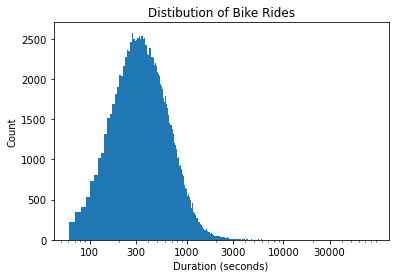

In [8]:
bins = np.arange(61, 84548+10, 10)
ticks = [100, 300, 1000, 3000, 10000, 30000]
tick_string = [str(x) for x in ticks]
plt.hist(data = trip_df, x= 'duration_sec', bins=bins)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distibution of Bike Rides')
plt.xscale('log')
plt.xticks(ticks, tick_string);

## Population of Users by Type 

There were two categories of users - **Subscribers** and **Customers**. Subscribers exceeded the Customer category by a very large extent.

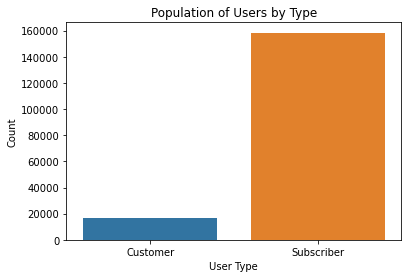

In [9]:
# make_countplot
sns.countplot(data = user_df, x='user_type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Population of Users by Type');

## User Population by Gender

Three gender groups were recorded - Male, Female, and Other. The Male gender group was evidently greater than the other two.

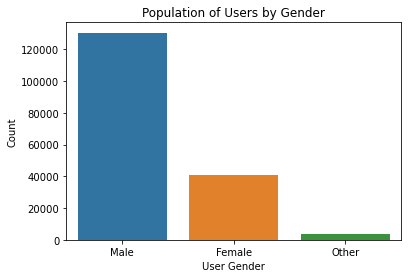

In [10]:
sns.countplot(data = user_df, x='member_gender', order=user_df.member_gender.value_counts().index)
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.title('Population of Users by Gender');

## Gender Distribution Among Users

The male gender had the most population of users among all the genders. THe Subscriber user type which was more common than the Customer type remained so for all gender groups.

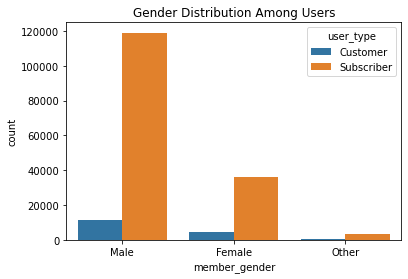

In [11]:
# make a plot to visualise number of user types for each gender
sns.countplot(data = user_df, x = 'member_gender', hue='user_type', order = user_df.member_gender.value_counts().index)
plt.title('Gender Distribution Among Users');

## Mean Trip Duration by User type

Customers took longer trips than Subscriber user type on average with almost a doubled score.

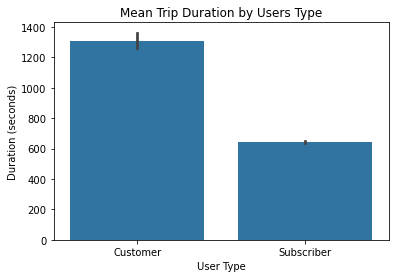

In [12]:
# use a barplot to show mean duration for each user type
colours = sns.color_palette()[0]
sns.barplot(x=user_df.user_type, y=trip_df.duration_sec, color=colours)
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.title('Mean Trip Duration by Users Type');

In [13]:
# create columns to record the day names for each ride from start_time column
trip_df['day_name'] = trip_df.start_time.dt.day_name()

# create an order for the the day_name in categorical format
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# convert the column to categorical datatype
def make_category(df, ordd):
    '''quick function to make order for ordinal categorical variables'''
    order = pd.api.types.CategoricalDtype(ordered=True, categories=ordd)
    return df.astype(order)

trip_df.day_name = make_category(trip_df.day_name, day_order)

## Daily Bike Usage by User types

The Subscribers had more usage for the bikes on every day of the week. However, there was less demand on the weekends than on weekdays.

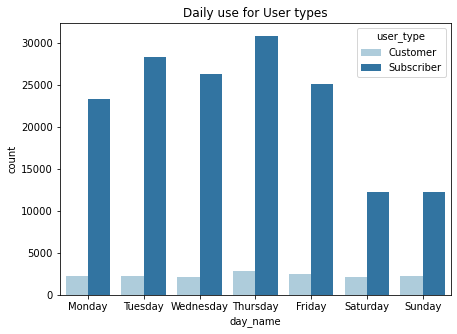

In [14]:
plt.figure(figsize=(7,5))

user_day = trip_df[['day_name']]
user_day = user_day.join(user_df.user_type)
sns.countplot(data=user_day, x='day_name', hue='user_type', palette='Paired')
plt.title('Daily use for User types');

## Daily Bike Use by Time of Day Among Users

The peak hours during the weekdays were around the mornings (**7 to 10**) and evenings (**15 to 17**). 

Whereas the weekend had a differnt pattern. More demand was seen between **10 and 15** on the weekends than any other hour.

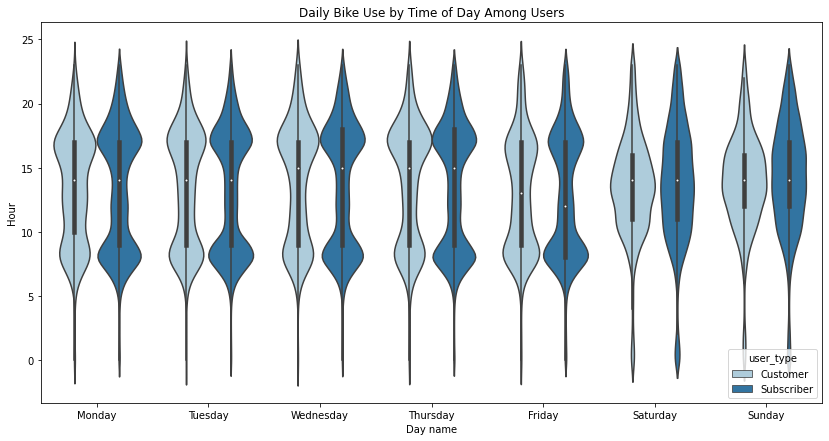

In [15]:
# create a column for the hour of each trip
trip_df['hour'] = trip_df.start_time.dt.hour

plt.figure(figsize=(14,7))
df2 = trip_df[['day_name', 'hour']].join(user_df.user_type)

# make a plot to visualize  relationship
sns.violinplot(data = df2, x='day_name', y='hour', hue='user_type', palette='Paired');
plt.xlabel('Day name')
plt.ylabel('Hour')
plt.title('Daily Bike Use by Time of Day Among Users');

In [16]:
!jupyter nbconvert uche_bikeshare_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook uche_bikeshare_slide_deck.ipynb to slides
[NbConvertApp] Writing 761846 bytes to uche_bikeshare_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)